# data1030 project

## loading dataset

In [21]:
import pandas as pd
df = pd.read_csv('diabetes_prediction_dataset.csv')    

## EDA

In [22]:
print(df.head())
cats = df.select_dtypes(include=['object','int64']).columns
nums = df.select_dtypes(include=['float64']).columns

   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         No Info  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_glucose_level  diabetes  
0          6.6                  140         0  
1          6.6                   80         0  
2          5.7                  158         0  
3          5.0                  155         0  
4          4.8                  155         0  


In [23]:
print(f'the dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'dataset dtypes:\n{df.dtypes}')

the dataset has 100000 rows and 9 columns
dataset dtypes:
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [24]:
print(f'check NAs:\n{df.isna().sum()/len(df)*100}')

check NAs:
gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64


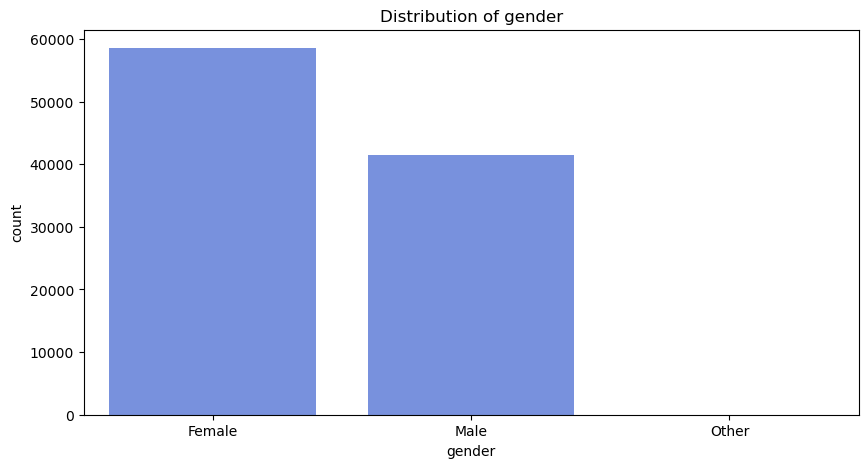

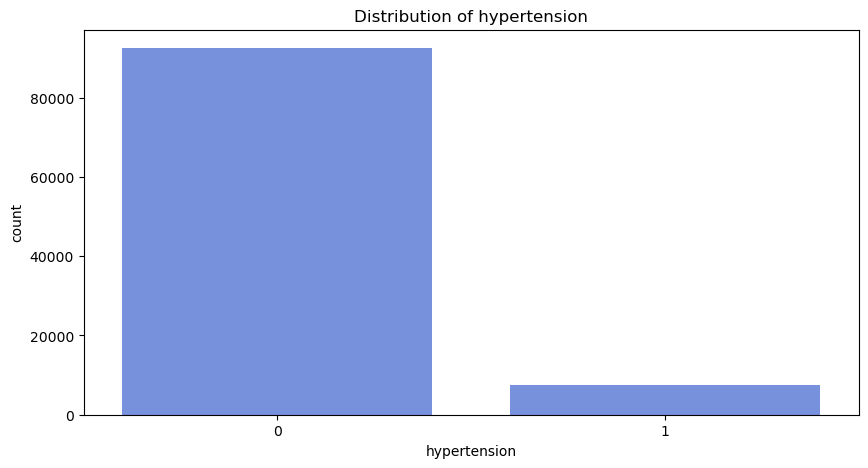

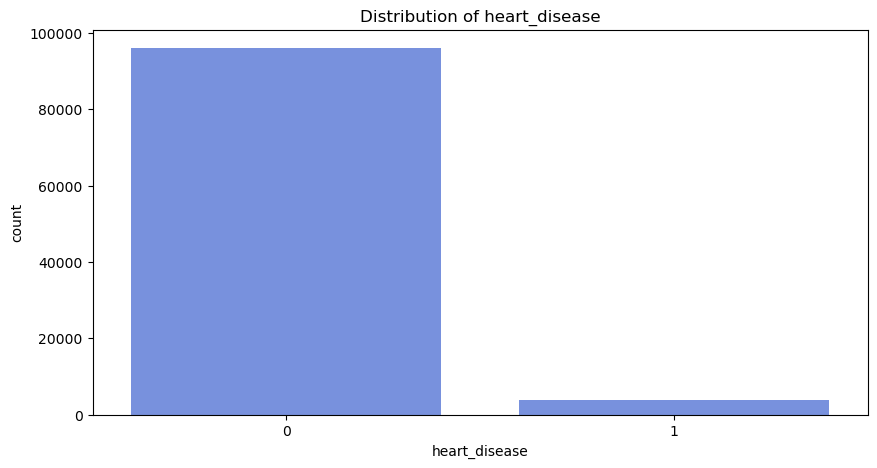

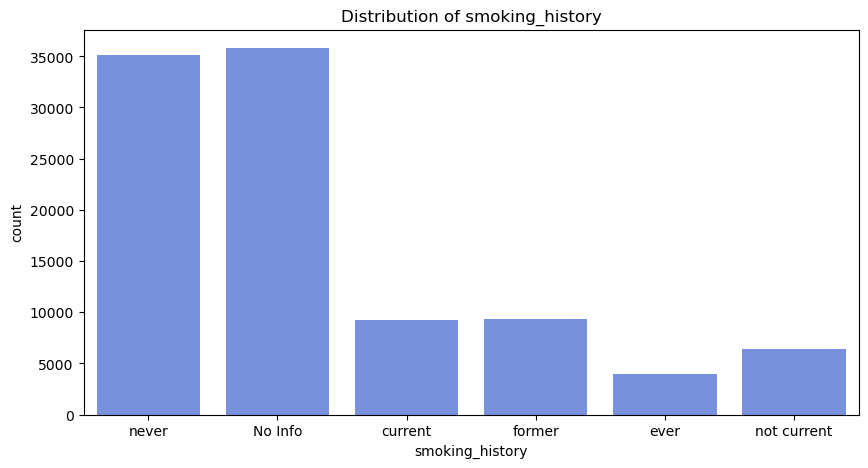

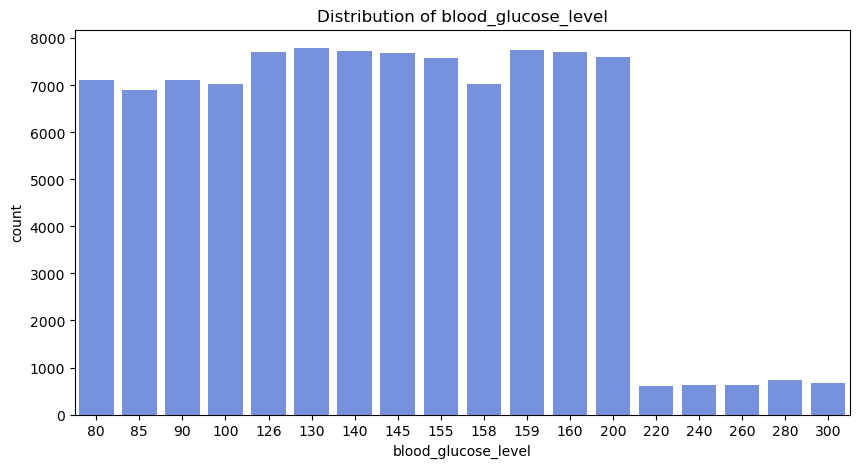

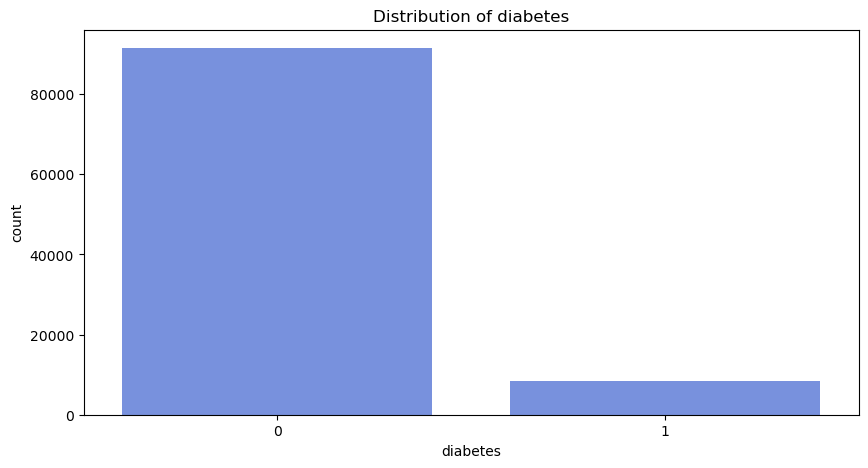

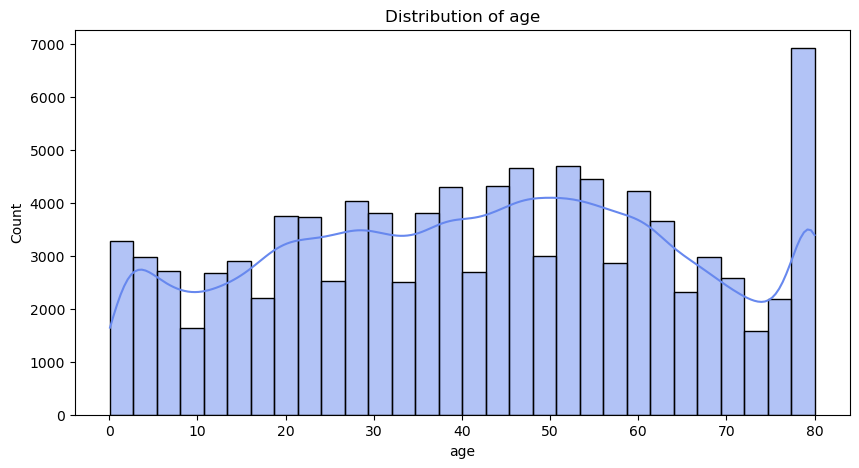

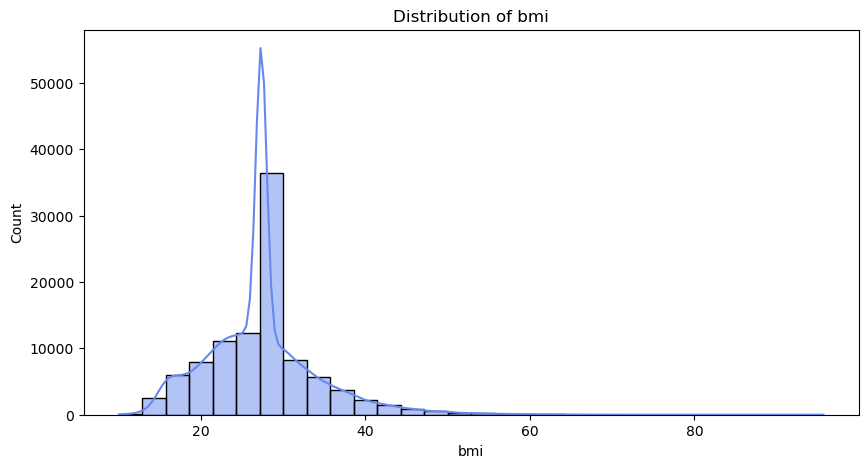

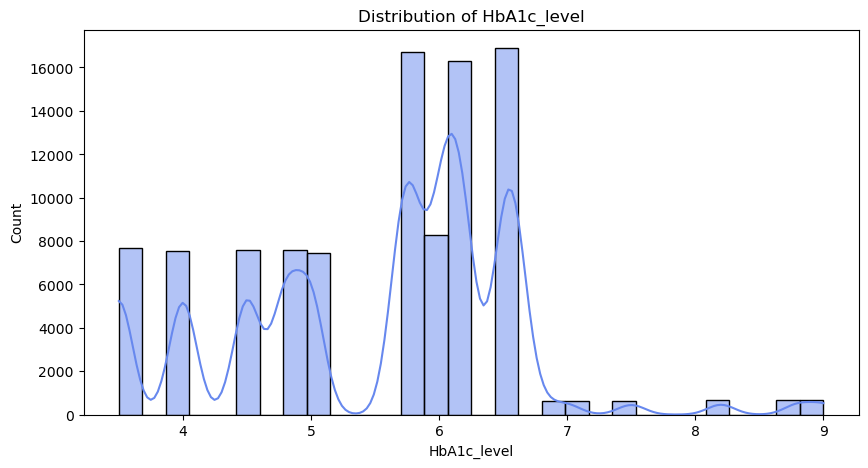

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_palette('coolwarm')

for col in cats:
    plt.figure(figsize=(10,5))
    sns.countplot(data=df, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()
for col in nums:
    plt.figure(figsize=(10,5))
    sns.histplot(data=df, x=col, kde=True,bins =30)
    plt.title(f'Distribution of {col}')
    plt.show()

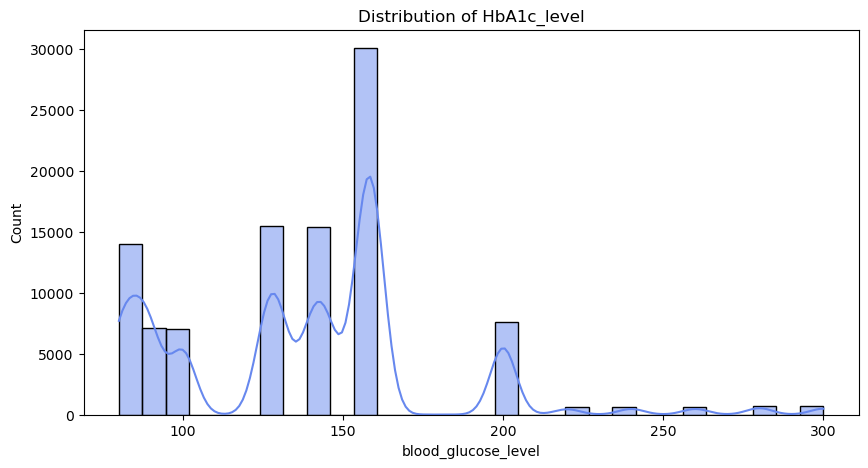

In [26]:
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='blood_glucose_level', kde=True,bins =30)
plt.title(f'Distribution of {col}')
plt.show()

In [27]:
df['blood_glucose_level'].value_counts()

blood_glucose_level
130    7794
159    7759
140    7732
160    7712
126    7702
145    7679
200    7600
155    7575
90     7112
80     7106
158    7026
100    7025
85     6901
280     729
300     674
240     636
260     635
220     603
Name: count, dtype: int64

In [28]:
# df['smoking_history'].map({'ever':'former', 'not current':'former'})
df['smoking_history'] = df['smoking_history'].replace({'ever':'former', 'not current':'former'})
df['smoking_history'].value_counts()


smoking_history
No Info    35816
never      35095
former     19803
current     9286
Name: count, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

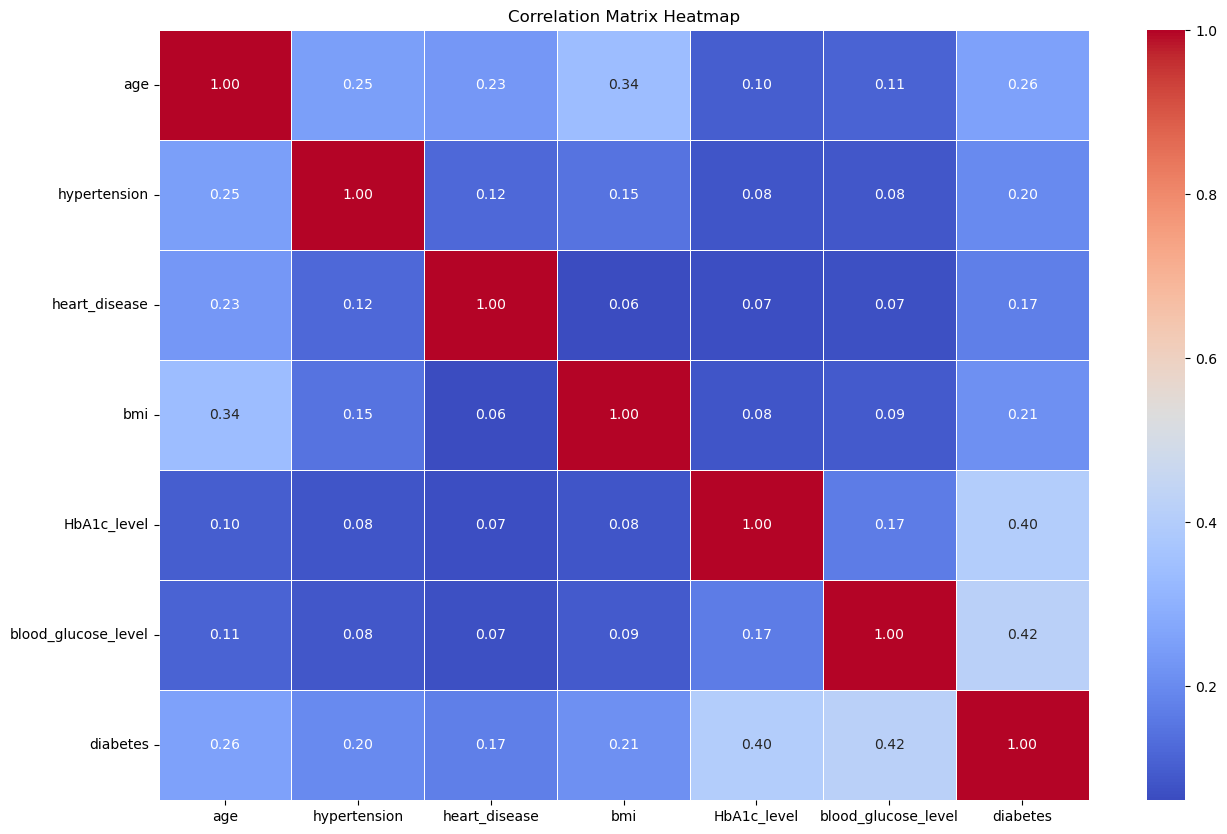

In [30]:
# Compute the correlation matrix
num = df.select_dtypes(include=['float64','int64'])
correlation_matrix = num.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

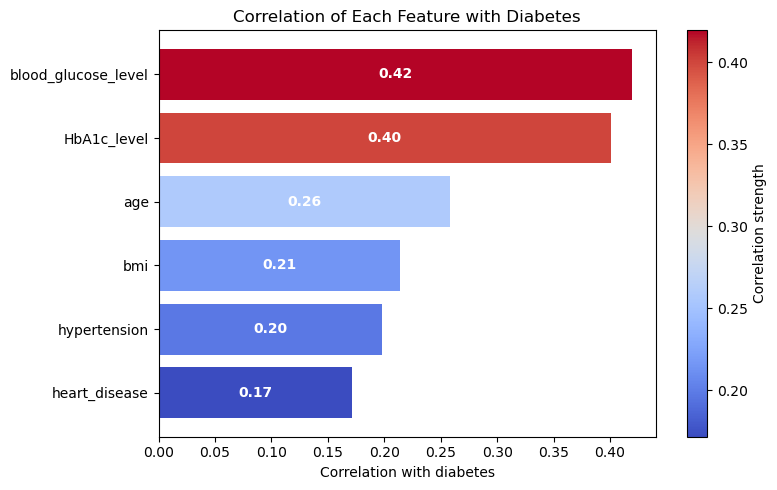

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Compute correlation matrix
num = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = num.corr()

# Extract correlations with diabetes
corr_with_diabetes = correlation_matrix['diabetes'].drop('diabetes')

# Sort by absolute correlation
corr_sorted = corr_with_diabetes.reindex(
    corr_with_diabetes.abs().sort_values(ascending=False).index
)

# Normalize correlation values for color mapping
norm = plt.Normalize(corr_sorted.min(), corr_sorted.max())
sm = plt.cm.ScalarMappable(cmap='coolwarm', norm=norm)
bar_colors = [sm.to_rgba(val) for val in corr_sorted]

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.barh(corr_sorted.index, corr_sorted.values, color=bar_colors)
ax.set_xlabel("Correlation with diabetes")
ax.set_title("Correlation of Each Feature with Diabetes")
ax.invert_yaxis()

# Add text annotations INSIDE the bars
for bar, value in zip(bars, corr_sorted.values):
    ax.text(
        bar.get_width() / 2,        # halfway along the bar
        bar.get_y() + bar.get_height() / 2,  # vertically centered
        f"{value:.2f}",             # format to 2 decimals
        ha="center", va="center", 
        color="white",              # white text stands out inside
        fontsize=10, fontweight="bold"
    )

# Add colorbar and link it to the current figure
cbar = fig.colorbar(sm, ax=ax)
cbar.set_label("Correlation strength")

plt.tight_layout()
plt.show()


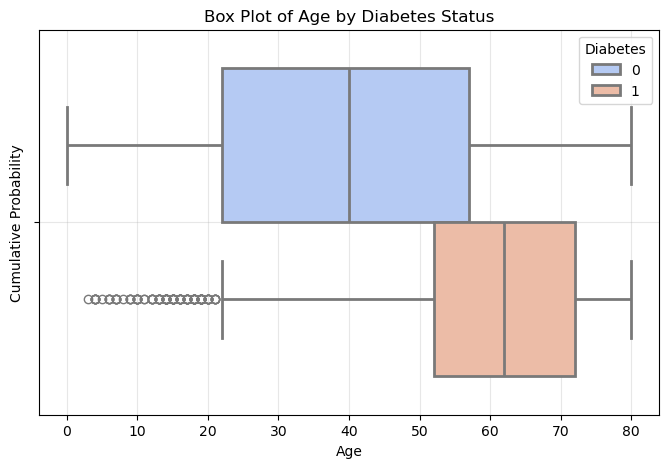

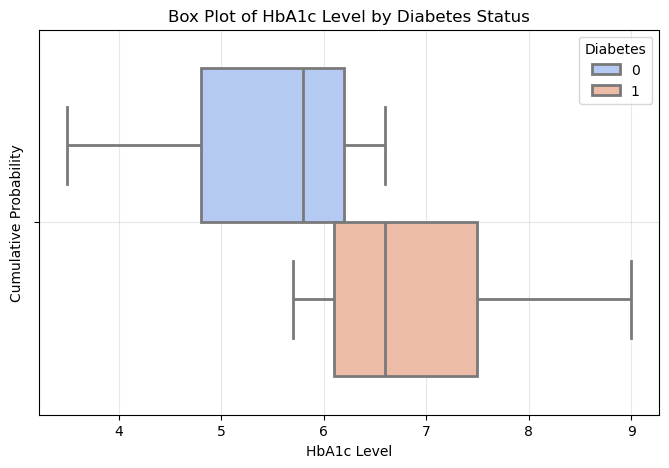

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

# ECDF plot for AGE
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='age', hue='diabetes', palette='coolwarm', linewidth=2)
plt.title("Box Plot of Age by Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Cumulative Probability")
plt.legend(title="Diabetes")
plt.grid(alpha=0.3)
plt.show()

# ECDF plot for HbA1c_level
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='HbA1c_level', hue='diabetes', palette='coolwarm', linewidth=2)
plt.title("Box Plot of HbA1c Level by Diabetes Status")
plt.xlabel("HbA1c Level")
plt.ylabel("Cumulative Probability")
plt.legend(title="Diabetes")
plt.grid(alpha=0.3)
plt.show()


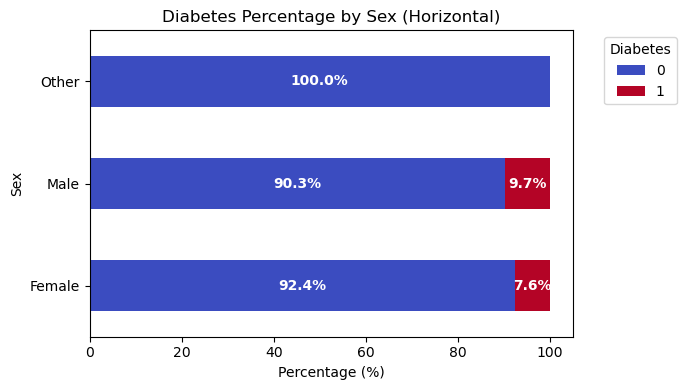

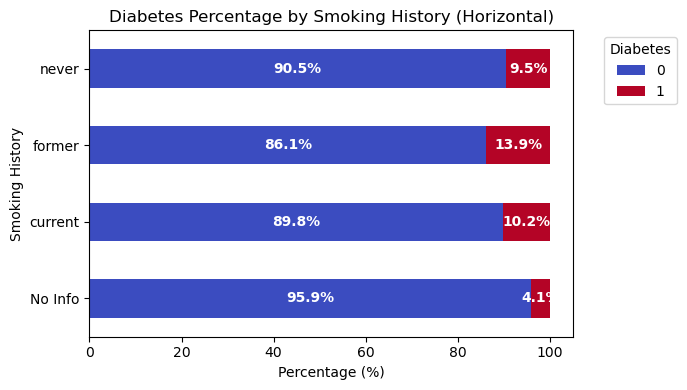

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate normalized percentages
ct = pd.crosstab(df['gender'], df['diabetes'], normalize='index') * 100

# Plot
ax = ct.plot(
    kind='barh', 
    stacked=True, 
    figsize=(7, 4), 
    colormap='coolwarm'
)

plt.title("Diabetes Percentage by Sex (Horizontal)")
plt.xlabel("Percentage (%)")
plt.ylabel("Sex")
plt.legend(title="Diabetes", bbox_to_anchor=(1.05, 1))

# Annotate each bar segment with percentage values
for i, (index, row) in enumerate(ct.iterrows()):
    cum_width = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:  # optional: only annotate if segment > 3% (prevents overlap)
            ax.text(
                cum_width + val / 2,  # middle of the segment
                i,                    # vertical position
                f"{val:.1f}%",        # label format
                va='center',
                ha='center',
                color='white',        # white text looks good on 'coolwarm'
                fontsize=10,
                fontweight='bold'
            )
        cum_width += val

plt.tight_layout()
plt.show()

import pandas as pd
import matplotlib.pyplot as plt

# Calculate normalized percentages
ct = pd.crosstab(df['smoking_history'], df['diabetes'], normalize='index') * 100

# Plot
ax = ct.plot(
    kind='barh', 
    stacked=True, 
    figsize=(7, 4), 
    colormap='coolwarm'
)

plt.title("Diabetes Percentage by Smoking History (Horizontal)")
plt.xlabel("Percentage (%)")
plt.ylabel("Smoking History")
plt.legend(title="Diabetes", bbox_to_anchor=(1.05, 1))

# Annotate each bar segment with percentage values
for i, (index, row) in enumerate(ct.iterrows()):
    cum_width = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:  # optional: only annotate if segment > 3% (prevents overlap)
            ax.text(
                cum_width + val / 2,  # middle of the segment
                i,                    # vertical position
                f"{val:.1f}%",        # label format
                va='center',
                ha='center',
                color='white',        # white text looks good on 'coolwarm'
                fontsize=10,
                fontweight='bold'
            )
        cum_width += val

plt.tight_layout()
plt.show()


C:\Users\14452\AppData\Local\Temp\ipykernel_35384\194200997.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='smoking_history',  palette='coolwarm')


<Axes: xlabel='smoking_history', ylabel='count'>

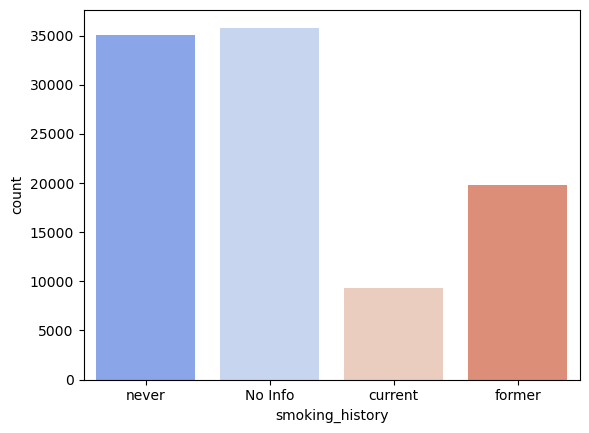

In [34]:
sns.countplot(data=df, x='smoking_history',  palette='coolwarm')

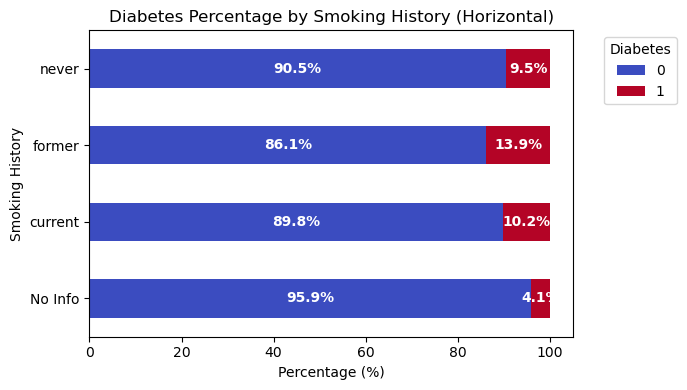

In [35]:
# Calculate normalized percentages
import matplotlib.pyplot as plt
df['smoking_history'] = df['smoking_history'].fillna('No Info')
ct = pd.crosstab(df['smoking_history'], df['diabetes'], normalize='index') * 100

# Plot
ax = ct.plot(
    kind='barh', 
    stacked=True, 
    figsize=(7, 4), 
    colormap='coolwarm'
)

plt.title("Diabetes Percentage by Smoking History (Horizontal)")
plt.xlabel("Percentage (%)")
plt.ylabel("Smoking History")
plt.legend(title="Diabetes", bbox_to_anchor=(1.05, 1))

# Annotate each bar segment with percentage values
for i, (index, row) in enumerate(ct.iterrows()):
    cum_width = 0
    for j, (col, val) in enumerate(row.items()):
        if val > 3:  # optional: only annotate if segment > 3% (prevents overlap)
            ax.text(
                cum_width + val / 2,  # middle of the segment
                i,                    # vertical position
                f"{val:.1f}%",        # label format
                va='center',
                ha='center',
                color='white',        # white text looks good on 'coolwarm'
                fontsize=10,
                fontweight='bold'
            )
        cum_width += val

plt.tight_layout()
plt.show()


## Replace imputed bmi back to NA

In [36]:
import numpy as np
df.replace({'bmi': {27.32:np.nan}}, inplace=True)

## model pipeline

In [41]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

num = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
cat = ['gender','smoking_history']

numeric_transformer = Pipeline(steps=[
    ('imputer', IterativeImputer(max_iter=5, random_state=42)),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num),
        ('cat', categorical_transformer, cat)
    ]
)


In [42]:
from sklearn.model_selection import train_test_split

X = df.drop('diabetes', axis=1)
y = df['diabetes']

X_train, X_other, y_train, y_other = train_test_split(
    X, y, test_size=0.4, stratify=y, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(
    X_other, y_other, test_size=0.5, stratify=y_other, random_state=42
)



In [43]:
from imblearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
logreg_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', LogisticRegression(max_iter=500))
])
rf_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', RandomForestClassifier(random_state=42))
])
svm_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', SVC())
])
xgb_clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

logreg_param = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}
rf_param = {
    'model__n_estimators': [200, 500],
    'model__max_depth': [5, 10, None],
    'model__min_samples_split': [2, 5],
    'model__min_samples_leaf': [1, 2]
}
svm_param = {
    'model__C': [0.1, 1, 10],
    'model__kernel': ['rbf', 'linear'],
    'model__gamma': ['scale', 'auto']
}
xgb_param = {
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__subsample': [0.7, 1],
    'model__colsample_bytree': [0.7, 1]
}


In [45]:
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle   # <-- REQUIRED

results = {}
cv_scores_mean = []
cv_scores_std = []
test_scores = []
model_names = []

# Make sure this dictionary is defined BEFORE the loop
models = {
    "Logistic Regression": (logreg_clf, logreg_param),
    "Random Forest": (rf_clf, rf_param),
    "SVM": (svm_clf, svm_param),
    "XGBoost": (xgb_clf, xgb_param)
}

for name, (clf, param) in models.items():
    print(f"Running {name}...")
    
    grid = GridSearchCV(
        estimator=clf,
        param_grid=param,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=0
    )
    
    grid.fit(X_train, y_train)

    # Extract CV mean/std
    mean_cv = grid.cv_results_['mean_test_score'][grid.best_index_]
    std_cv = grid.cv_results_['std_test_score'][grid.best_index_]

    # Compute test F1
    y_pred_test = grid.best_estimator_.predict(X_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Store values for visualization later
    model_names.append(name)
    cv_scores_mean.append(mean_cv)
    cv_scores_std.append(std_cv)
    test_scores.append(test_f1)

    # Store in main results dictionary
    results[name] = {
        'Best Params': grid.best_params_,
        'CV Mean F1': mean_cv,
        'CV Std F1': std_cv,
        'Test F1': test_f1
    }

results

# Save everything to pickle
objects_to_save = {
    "results": results,
    "model_names": model_names,
    "cv_scores_mean": cv_scores_mean,
    "cv_scores_std": cv_scores_std,
    "test_scores": test_scores
}

with open("smote_metrics.pkl", "wb") as f:
    pickle.dump(objects_to_save, f)

print("Saved smote_metrics.pkl successfully.")


Running Logistic Regression...
Running Random Forest...
Running SVM...
Running XGBoost...
Saved smote_metrics.pkl successfully.


c:\Users\14452\anaconda3\envs\data1030\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:33:50] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [47]:
results

{'Logistic Regression': {'Best Params': {'model__C': 0.01,
   'model__penalty': 'l2',
   'model__solver': 'lbfgs'},
  'CV Mean F1': np.float64(0.5566400926202713),
  'CV Std F1': np.float64(0.0036366250481791994),
  'Test F1': 0.5593471810089021},
 'Random Forest': {'Best Params': {'model__max_depth': None,
   'model__min_samples_leaf': 1,
   'model__min_samples_split': 5,
   'model__n_estimators': 200},
  'CV Mean F1': np.float64(0.7476956110140135),
  'CV Std F1': np.float64(0.008727993275829375),
  'Test F1': 0.7554507955215085},
 'SVM': {'Best Params': {'model__C': 10,
   'model__gamma': 'scale',
   'model__kernel': 'rbf'},
  'CV Mean F1': np.float64(0.5687960329077341),
  'CV Std F1': np.float64(0.007993082601424012),
  'Test F1': 0.5672567986858916},
 'XGBoost': {'Best Params': {'model__colsample_bytree': 1,
   'model__learning_rate': 0.2,
   'model__max_depth': 5,
   'model__subsample': 1},
  'CV Mean F1': np.float64(0.7873509082625423),
  'CV Std F1': np.float64(0.0113955134982

## Model without SMOTE


In [50]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold, GridSearchCV, train_test_split
from sklearn.metrics import f1_score

from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

import numpy as np
import pickle

logreg_clf_no_smote = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500))
])

rf_clf_no_smote = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(random_state=42))
])

svm_clf_no_smote = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', SVC())
])

xgb_clf_no_smote = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
])

models_no_smote = {
    "Logistic Regression": (logreg_clf_no_smote, logreg_param),
    "Random Forest": (rf_clf_no_smote, rf_param),
    "SVM": (svm_clf_no_smote, svm_param),
    "XGBoost": (xgb_clf_no_smote, xgb_param)
}
def evaluate_models(models_dict, X_train, y_train, X_test, y_test):
    results = {}
    model_names = []
    cv_means = []
    cv_stds = []
    test_scores = []

    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

    for name, (clf, param) in models_dict.items():
        print(f"Running {name}...")

        grid = GridSearchCV(
            estimator=clf,
            param_grid=param,
            cv=cv,
            scoring='f1',
            n_jobs=-1
        )

        grid.fit(X_train, y_train)

        mean_cv = grid.cv_results_['mean_test_score'][grid.best_index_]
        std_cv = grid.cv_results_['std_test_score'][grid.best_index_]
        test_f1 = f1_score(y_test, grid.best_estimator_.predict(X_test))

        model_names.append(name)
        cv_means.append(mean_cv)
        cv_stds.append(std_cv)
        test_scores.append(test_f1)

        results[name] = {
            "Best Params": grid.best_params_,
            "CV Mean F1": mean_cv,
            "CV Std F1": std_cv,
            "Test F1": test_f1
        }

    return results, model_names, cv_means, cv_stds, test_scores
results_no_smote, names_no_smote, cv_mean_no_smote, cv_std_no_smote, test_no_smote = evaluate_models(
    models_no_smote, X_train, y_train, X_test, y_test)
with open("results_no_smote.pkl", "wb") as f:
    pickle.dump(results_no_smote, f)

Running Logistic Regression...
Running Random Forest...
Running SVM...
Running XGBoost...


c:\Users\14452\anaconda3\envs\data1030\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:41:04] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


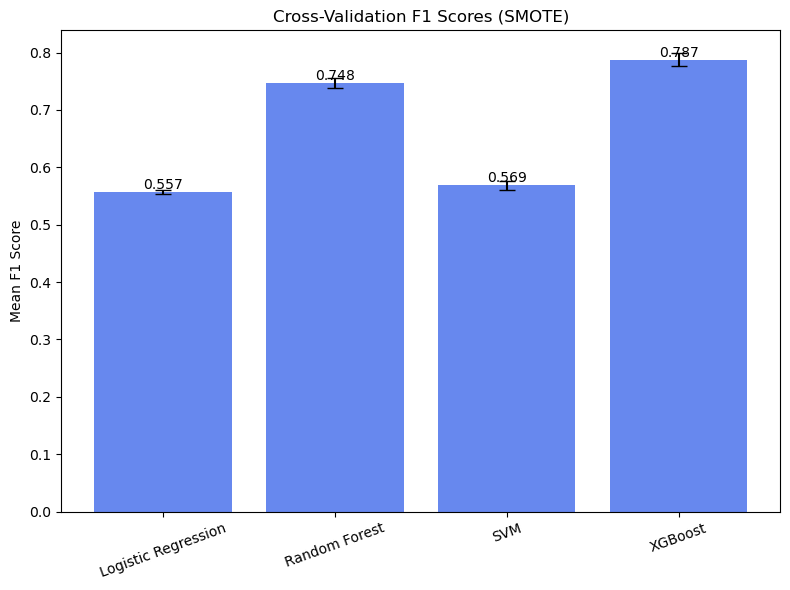

In [52]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(8,6))
plt.bar(model_names, cv_scores_mean, yerr=cv_scores_std, capsize=6)

for i, v in enumerate(cv_scores_mean):
    plt.text(i, v + 0.005, f"{v:.3f}", ha="center", fontsize=10)

plt.title("Cross-Validation F1 Scores (SMOTE)")
plt.ylabel("Mean F1 Score")
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()


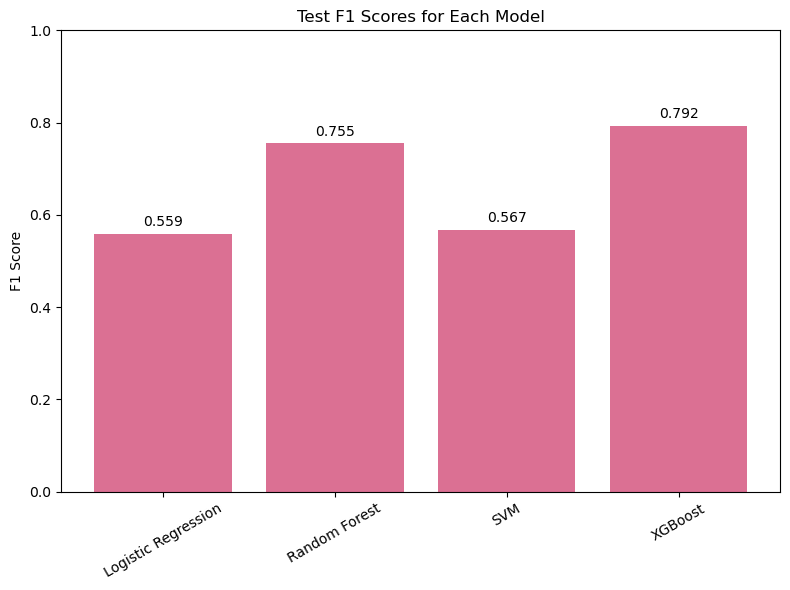

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
bars = plt.bar(model_names, test_scores, color='palevioletred')

plt.title("Test F1 Scores for Each Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1)
plt.xticks(rotation=30)
plt.tight_layout()

# Add numeric labels above bars
for bar, value in zip(bars, test_scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2,
        height + 0.01,
        f"{value:.3f}",       # three decimal places
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.show()


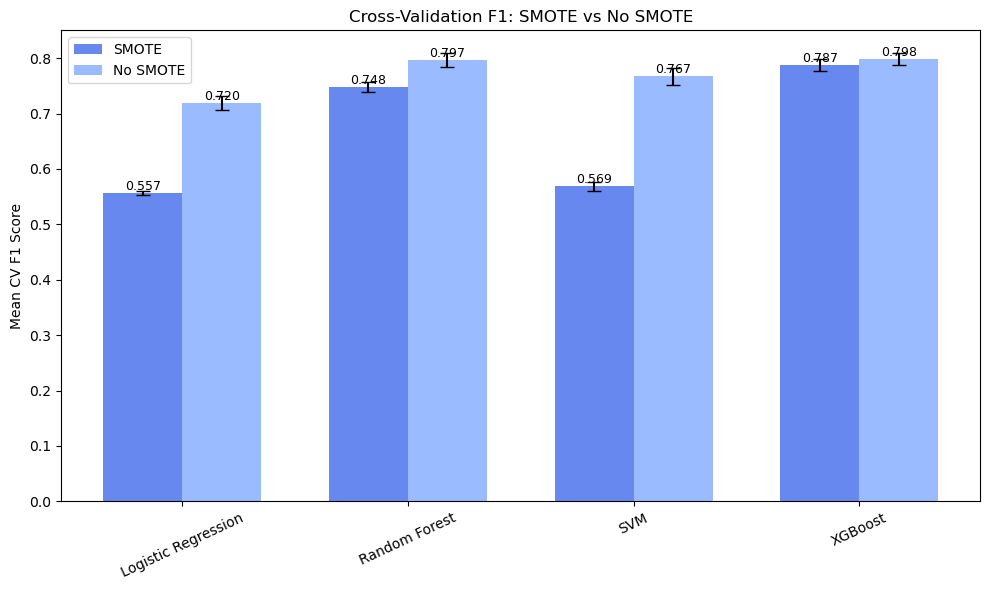

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ensure same order of models
x = np.arange(len(model_names))  # SMOTE names define the order
width = 0.35

plt.figure(figsize=(10,6))

# SMOTE bars
plt.bar(x - width/2, cv_scores_mean, width, 
        yerr=cv_scores_std, capsize=5, label="SMOTE")

# NO SMOTE bars
plt.bar(x + width/2, cv_mean_no_smote, width, 
        yerr=cv_std_no_smote, capsize=5, label="No SMOTE")


# SMOTE bar labels
for i, v in enumerate(cv_scores_mean):
    plt.text(x[i] - width/2, v + 0.005, f"{v:.3f}", ha='center', fontsize=9)

# NO SMOTE bar labels
for i, v in enumerate(cv_mean_no_smote):
    plt.text(x[i] + width/2, v + 0.005, f"{v:.3f}", ha='center', fontsize=9)

plt.xticks(x, model_names, rotation=25)
plt.ylabel("Mean CV F1 Score")
plt.title("Cross-Validation F1: SMOTE vs No SMOTE")
plt.legend()
plt.tight_layout()
plt.show()


Fitting 5 folds for each of 36 candidates, totalling 180 fits


c:\Users\14452\anaconda3\envs\data1030\Lib\site-packages\xgboost\training.py:183: UserWarning: [01:45:54] WARNING: D:\bld\xgboost-split_1745056707810\work\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best params (XGB no SMOTE): {'model__colsample_bytree': 1, 'model__learning_rate': 0.2, 'model__max_depth': 3, 'model__subsample': 0.7}
Best CV F1 (XGB no SMOTE): 0.798372449062375
[[18276    24]
 [  524  1176]]


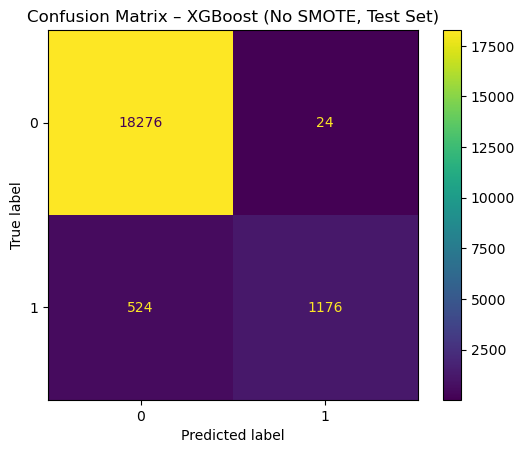

In [57]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# 1. Get the no-SMOTE XGBoost pipeline + its param grid
xgb_clf_no_smote, xgb_param_no_smote = models_no_smote["XGBoost"]

# 2. Refit GridSearchCV for XGBoost (no SMOTE)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

xgb_grid_no_smote = GridSearchCV(
    estimator=xgb_clf_no_smote,
    param_grid=xgb_param_no_smote,
    cv=cv,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)

xgb_grid_no_smote.fit(X_train, y_train)

print("Best params (XGB no SMOTE):", xgb_grid_no_smote.best_params_)
print("Best CV F1 (XGB no SMOTE):", xgb_grid_no_smote.best_score_)

# 3. Predictions on TEST SET
y_pred_xgb_no_smote = xgb_grid_no_smote.best_estimator_.predict(X_test)

# 4. Confusion matrix
cm_xgb_no_smote = confusion_matrix(y_test, y_pred_xgb_no_smote)
print(cm_xgb_no_smote)

# 5. Nicely plotted confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb_no_smote)
disp.plot()
plt.title("Confusion Matrix – XGBoost (No SMOTE, Test Set)")
plt.show()


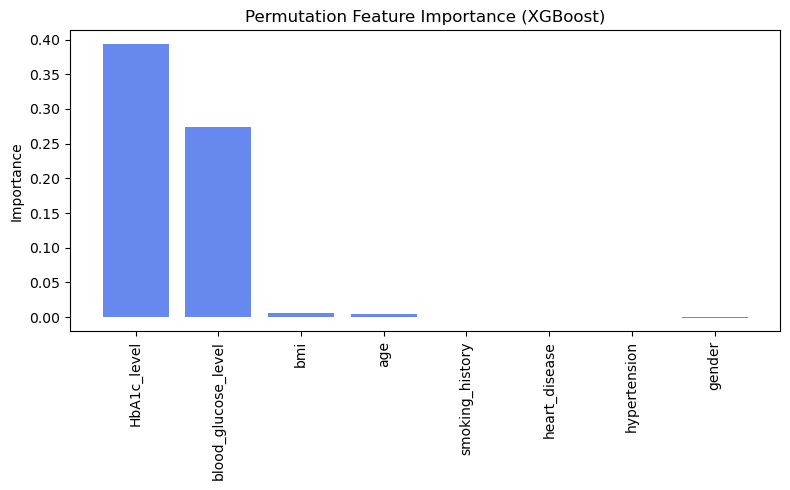

In [63]:
from sklearn.inspection import permutation_importance
import numpy as np
best_model = xgb_grid_no_smote.best_estimator_
best_model_name = max(results_no_smote, key=lambda x: results[x]['Test F1'])
r = permutation_importance(
    best_model, X_test, y_test,
    n_repeats=10, random_state=42, scoring='f1', n_jobs=-1
)

importances = r.importances_mean
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(8,5))
plt.bar(np.array(X.columns)[indices], importances[indices])
plt.xticks(rotation=90)
plt.title(f"Permutation Feature Importance ({best_model_name})")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


Class 0 SHAP values:


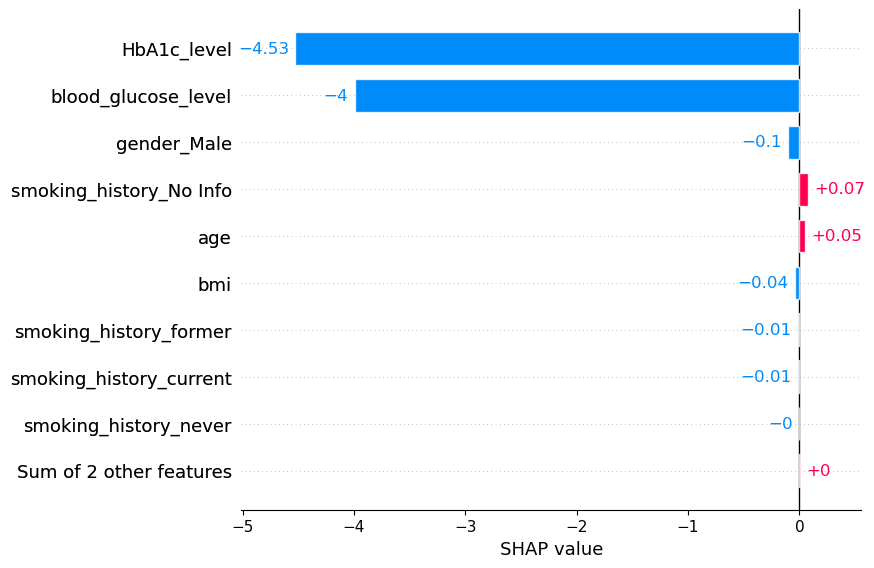

Class 1 SHAP values:


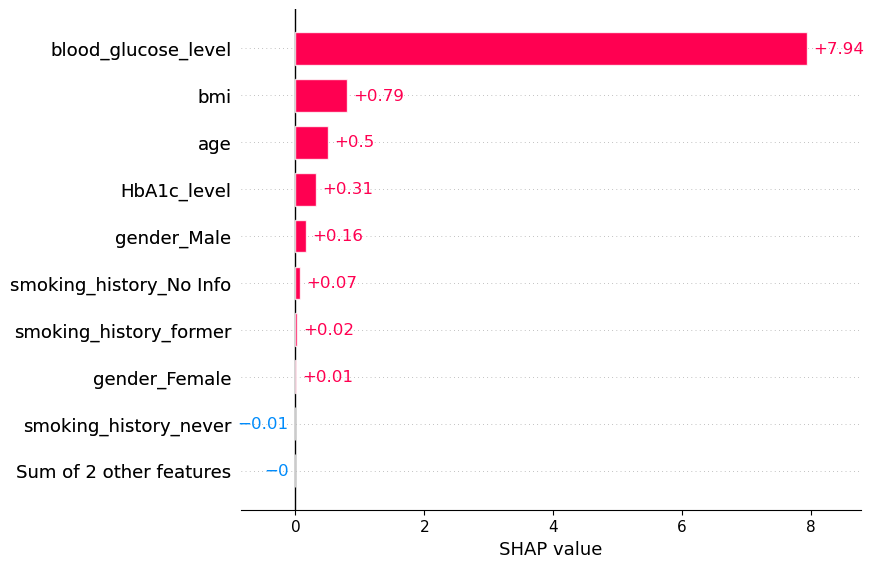

In [70]:
import shap
import numpy as np
import pandas as pd

# ================================
# 1. Preprocess & SHAP setup
# ================================
preprocess = best_model.named_steps["preprocess"]
xgb_model = best_model.named_steps["model"]

X_test_trans = preprocess.transform(X_test)

# Get feature names
num_features = num
ohe = preprocess.named_transformers_["cat"].named_steps["encoder"]
cat_features = ohe.get_feature_names_out(cat).tolist()
feature_names = np.concatenate([num_features, cat_features])

# ================================
# 2. Select 1 class-0 and 1 class-1 sample
# ================================
idx0 = y_test[y_test == 0].index[1]
idx1 = y_test[y_test == 1].index[1]

x0_raw = X_test.loc[[idx0]]
x1_raw = X_test.loc[[idx1]]

x0 = preprocess.transform(x0_raw)
x1 = preprocess.transform(x1_raw)

# ================================
# 3. SHAP explainer
# ================================
explainer = shap.TreeExplainer(xgb_model)

shap_x0 = explainer.shap_values(x0)[0]
shap_x1 = explainer.shap_values(x1)[0]

# ================================
# 4. FIXED PLOTS (no plt.figure!!)
# ================================

print("Class 0 SHAP values:")
shap.plots.bar(shap.Explanation(shap_x0, feature_names=feature_names))

print("Class 1 SHAP values:")
shap.plots.bar(shap.Explanation(shap_x1, feature_names=feature_names))
